In [1]:
import pandas as pd
import numpy as np
import datetime
import requests
import warnings

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import seaborn as sns
import squarify
import plotly.offline as py
import plotly_express as px


from IPython.display import Image
warnings.filterwarnings('ignore')
%matplotlib inline

age_details = pd.read_csv('../input/covid19-in-india/AgeGroupDetails.csv')
india_covid_19 = pd.read_csv('../input/covid19-in-india/covid_19_india.csv')
hospital_beds = pd.read_csv('../input/covid19-in-india/HospitalBedsIndia.csv')
individual_details = pd.read_csv('../input/covid19-in-india/IndividualDetails.csv')
ICMR_labs = pd.read_csv('../input/covid19-in-india/ICMRTestingLabs.csv')
state_testing = pd.read_csv('../input/covid19-in-india/StatewiseTestingDetails.csv')
population = pd.read_csv('../input/covid19-in-india/population_india_census2011.csv')

confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [2]:
deaths_df[recovered_df.columns[-1:]].sum()

8/1/20    685054
dtype: int64

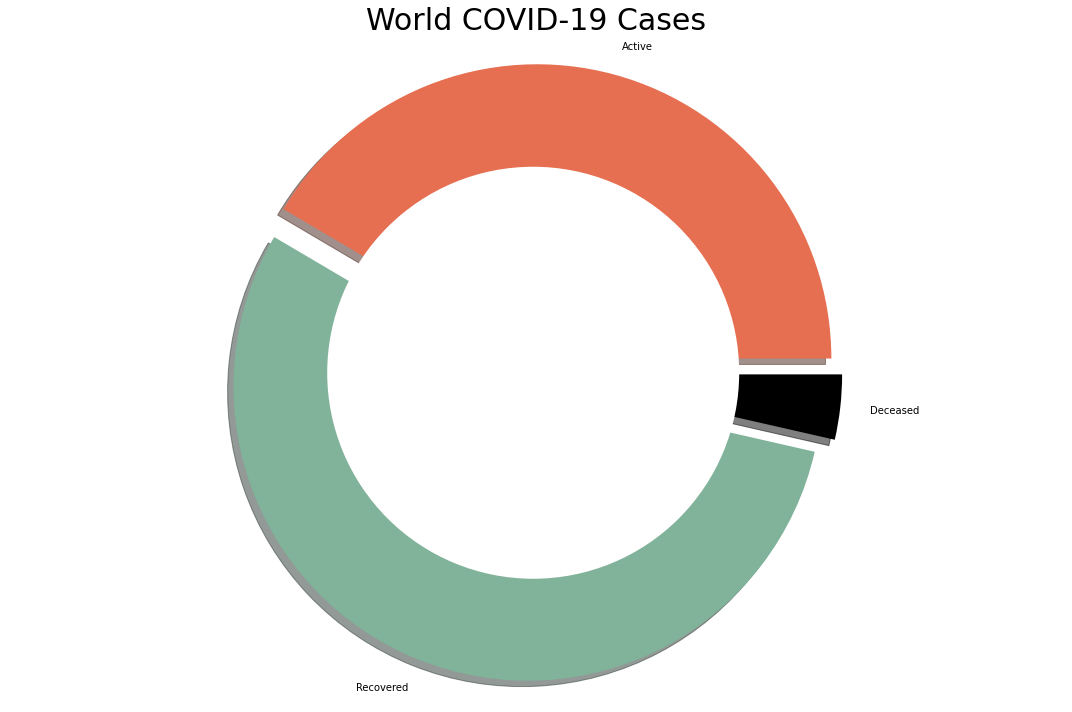

In [3]:
world_confirmed = confirmed_df[confirmed_df.columns[-1:]].sum()
world_recovered = recovered_df[recovered_df.columns[-1:]].sum()
world_deaths = deaths_df[deaths_df.columns[-1:]].sum()
world_active = world_confirmed - (world_recovered - world_deaths)


names = ['Active','Recovered','Deceased']
sizes = [world_active,world_recovered,world_deaths]
color= ['#e76f51','#81b29a','#000000']
explode = [0.05 for i in names]


plt.figure(figsize= (15,10))
plt.pie(sizes, labels = names, startangle=0, explode =explode,colors = color, shadow = True)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('World COVID-19 Cases',fontsize = 30)
plt.axis('equal')  
plt.tight_layout()


In [4]:
df = pd.read_csv('/kaggle/input/covid19-in-india/AgeGroupDetails.csv', usecols=['AgeGroup', 'TotalCases'])
df_d = pd.read_csv('/kaggle/input/covid19-in-india/AgeGroupDetails.csv')
fig = px.bar(df_d[['AgeGroup', 'Percentage']].sort_values('Percentage', ascending=False), 
             x="Percentage", y="AgeGroup", color='AgeGroup',color_discrete_sequence = px.colors.sequential.Darkmint
              ,title='Infections by age group',orientation='h')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',yaxis_title='Age Group',xaxis_title='Percentages')
fig.update_layout(template = 'plotly_white')
fig.show()

In [5]:
individual_details['gender'].value_counts()

M    3547
F    1766
Name: gender, dtype: int64

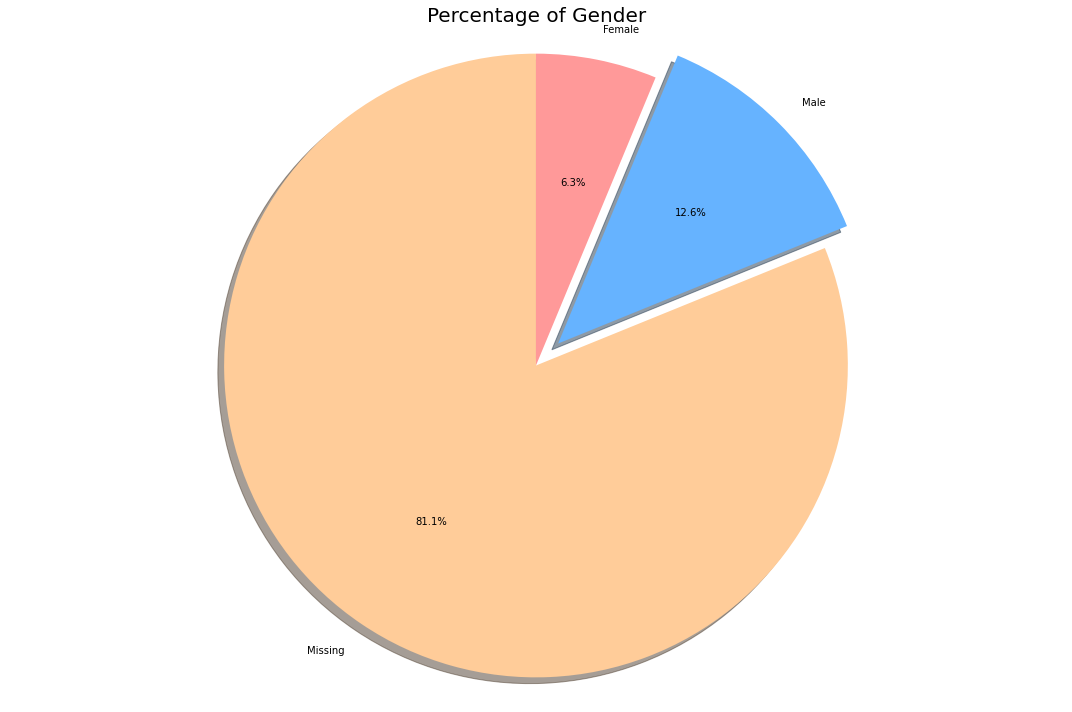

In [6]:
labels = ['Missing', 'Male', 'Female']
sizes = []
sizes.append(individual_details['gender'].isnull().sum())
sizes.append(list(individual_details['gender'].value_counts())[0])
sizes.append(list(individual_details['gender'].value_counts())[1])

explode = (0, 0.1, 0)
colors = ['#ffcc99','#66b3ff','#ff9999']

plt.figure(figsize= (15,10))
plt.title('Percentage of Gender',fontsize = 20)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.tight_layout()

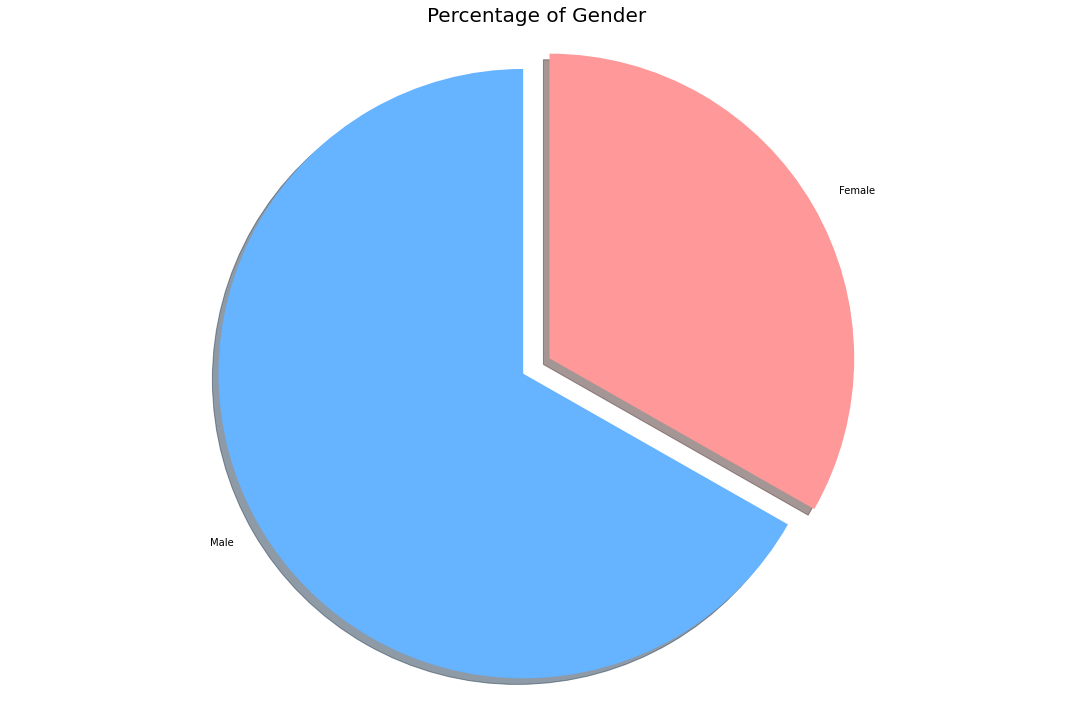

In [7]:
labels = ['Male', 'Female']
sizes = []
# sizes.append(individual_details['gender'].isnull().sum())
sizes.append(list(individual_details['gender'].value_counts())[0])
sizes.append(list(individual_details['gender'].value_counts())[1])

explode = (0.1, 0)
colors = ['#66b3ff','#ff9999']

plt.figure(figsize= (15,10))
plt.title('Percentage of Gender',fontsize = 20)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,shadow=True, startangle=90)
plt.axis('equal')
plt.tight_layout()

In [8]:
state_cases = india_covid_19.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()

#state_cases = state_cases.astype({'Deaths': 'int'})
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Deaths']+state_cases['Cured'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Blues',subset=["Active"])\
                        .background_gradient(cmap='Reds',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Blues',subset=["Cure Rate (per 100)"])

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
22,Maharashtra,431719,15316,266883,149520,3.550000,61.820000
32,Tamil Nadu,251738,4034,190966,56738,1.600000,75.860000
1,Andhra Pradesh,150209,1407,76614,72188,0.940000,51.000000
11,Delhi,136716,3989,122131,10596,2.920000,89.330000
18,Karnataka,129287,2412,53648,73227,1.870000,41.500000
39,Uttar Pradesh,89048,1677,51334,36037,1.880000,57.650000
41,West Bengal,72777,1629,50517,20631,2.240000,69.410000
35,Telengana,64786,530,46502,17754,0.820000,71.780000
13,Gujarat,62463,2464,45699,14300,3.940000,73.160000
36,Telengana***,57142,480,42909,13753,0.840000,75.090000


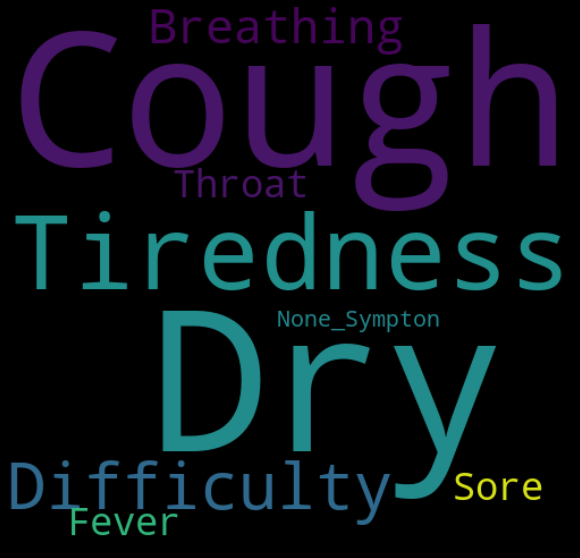

In [9]:
symptoms = pd.read_csv('/kaggle/input/covid19-symptoms-checker/Raw-Data.csv', usecols=['Symptoms'])
from wordcloud import WordCloud, STOPWORDS
# Create and generate a word cloud image:
wordcloud = WordCloud(width=500, height=480, margin=0, stopwords=STOPWORDS, collocations=False).generate(' '.join(symptoms['Symptoms']))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()